In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from pathlib import Path
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime as dt



In [2]:

#Read and load csv files 
file_path = Path("resources/dataset.csv")
df = pd.read_csv(file_path, sep = ',')
df.head(20)



,date,vendor_id,item_id,item_price,item_cnt_day
0,02.01.2013,59,22154,999.00,1.0
1,03.01.2013,25,2552,899.00,1.0
2,05.01.2013,25,2552,899.00,-1.0
3,06.01.2013,25,2554,1709.05,1.0
4,15.01.2013,25,2555,1099.00,1.0
5,10.01.2013,25,2564,349.00,1.0
6,02.01.2013,25,2565,549.00,1.0
7,04.01.2013,25,2572,239.00,1.0
8,11.01.2013,25,2572,299.00,1.0
9,03.01.2013,25,2573,299.00,3.0


In [3]:
# convert date to date format yyyy-mm-dd
df["date"] = pd.to_datetime(df['date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   vendor_id     int64         
 2   item_id       int64         
 3   item_price    float64       
 4   item_cnt_day  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 112.0 MB


In [4]:
df["revenue"] = (df['item_price'] * df['item_cnt_day'])
df.head(20)

,date,vendor_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,59,22154,999.00,1.0,999.00
1,2013-01-03,25,2552,899.00,1.0,899.00
2,2013-01-05,25,2552,899.00,-1.0,-899.00
3,2013-01-06,25,2554,1709.05,1.0,1709.05
4,2013-01-15,25,2555,1099.00,1.0,1099.00
5,2013-01-10,25,2564,349.00,1.0,349.00
6,2013-01-02,25,2565,549.00,1.0,549.00
7,2013-01-04,25,2572,239.00,1.0,239.00
8,2013-01-11,25,2572,299.00,1.0,299.00
9,2013-01-03,25,2573,299.00,3.0,897.00


In [5]:
#filter_vendor_id = (df["vendor_id"] == 25 | df["vendor_id"] == 31)
vendor25_31_df = df.loc[(df["vendor_id"] == 25) | (df["vendor_id"] == 31)]
vendor25_31_df

vendor25_31_df.describe()

,vendor_id,item_id,item_price,item_cnt_day,revenue
count,421740.000000,421740.000000,421740.000000,421740.000000,4.217400e+05
mean,28.352340,10981.925122,773.749202,1.310516,1.071033e+03
std,2.979241,6214.530320,1450.502815,2.346572,5.815128e+03
min,25.000000,18.000000,0.100000,-2.000000,-2.799000e+04
25%,25.000000,5380.000000,229.000000,1.000000,2.490000e+02
50%,31.000000,11068.000000,399.000000,1.000000,3.990000e+02
75%,31.000000,16175.000000,799.000000,1.000000,9.990000e+02
max,31.000000,22169.000000,50999.000000,501.000000,1.642100e+06


In [6]:
#Check for duplicates
vendor25_31_df.duplicated(subset=['vendor_id']).value_counts()

True     421738
False         2
dtype: int64

In [7]:
# Check for null values
vendor25_31_df.isna().sum()

date            0
vendor_id       0
item_id         0
item_price      0
item_cnt_day    0
revenue         0
dtype: int64

In [8]:
#check data types
vendor25_31_df.dtypes

date            datetime64[ns]
vendor_id                int64
item_id                  int64
item_price             float64
item_cnt_day           float64
revenue                float64
dtype: object

In [9]:
# Vendor_id frequency
vendor25_31_df['vendor_id'].value_counts()

31    235636
25    186104
Name: vendor_id, dtype: int64

In [10]:
#item_id frequency
vendor25_31_df.item_id.value_counts()

20949    1663
5822      973
17717     766
7894      683
2808      665
         ... 
15726       1
18565       1
21007       1
14694       1
20559       1
Name: item_id, Length: 16480, dtype: int64

In [11]:
# Check for item count for negative values
total_negative_values = 0

for value in vendor25_31_df['item_cnt_day']:
    if value < 0:
        total_negative_values += 1
print (f"Total negative item_cnt_day  {total_negative_values}")   

Total negative item_cnt_day  767


In [12]:
# check item price for values less than 1
total_less_than_1_values = 0

for value in vendor25_31_df['item_price']:
    if value < 0:
        total_less_than_1_values += 1
print (f"Total Less than 1  item_price  {total_less_than_1_values}")        


Total Less than 1  item_price  0


## Create Time Series Model for Vendor 31

In [13]:
# Select data for vendor 31
vendor31_df = df.loc[(df["vendor_id"] == 31)]
vendor31_df

,date,vendor_id,item_id,item_price,item_cnt_day,revenue
60143,2013-01-03,31,4906,1794.0,2.0,3588.0
60144,2013-01-02,31,4906,1789.0,1.0,1789.0
60145,2013-01-11,31,4890,799.0,1.0,799.0
60146,2013-01-26,31,4901,1499.0,1.0,1499.0
60147,2013-01-25,31,4901,1499.0,1.0,1499.0
...,...,...,...,...,...,...
2928767,2015-10-01,31,1540,1999.0,1.0,1999.0
2928768,2015-10-07,31,1540,1999.0,1.0,1999.0
2928769,2015-10-10,31,1540,1999.0,1.0,1999.0
2928770,2015-10-23,31,1484,1199.0,1.0,1199.0


In [14]:
df_31 = pd.DataFrame({"date" : vendor31_df["date"],
                     "revenue": vendor31_df["revenue"]})
df_31.head()

,date,revenue
60143,2013-01-03,3588.0
60144,2013-01-02,1789.0
60145,2013-01-11,799.0
60146,2013-01-26,1499.0
60147,2013-01-25,1499.0


In [15]:
df_31 = df_31.set_index("date")
df_31.index

DatetimeIndex(['2013-01-03', '2013-01-02', '2013-01-11', '2013-01-26',
               '2013-01-25', '2013-01-23', '2013-01-14', '2013-01-12',
               '2013-01-11', '2013-01-08',
               ...
               '2015-10-25', '2015-10-02', '2015-10-21', '2015-10-24',
               '2015-10-26', '2015-10-01', '2015-10-07', '2015-10-10',
               '2015-10-23', '2015-10-26'],
              dtype='datetime64[ns]', name='date', length=235636, freq=None)

In [16]:
df_31 = df_31.revenue.resample('M').sum()
df_31

date
2013-01-31    6.334219e+06
2013-02-28    7.033617e+06
2013-03-31    7.977839e+06
2013-04-30    5.618394e+06
2013-05-31    5.230774e+06
2013-06-30    5.563319e+06
2013-07-31    4.886088e+06
2013-08-31    5.096481e+06
2013-09-30    8.763814e+06
2013-10-31    7.587450e+06
2013-11-30    9.652479e+06
2013-12-31    1.405517e+07
2014-01-31    6.456957e+06
2014-02-28    6.586474e+06
2014-03-31    6.997950e+06
2014-04-30    5.939940e+06
2014-05-31    5.999361e+06
2014-06-30    5.216905e+06
2014-07-31    4.692557e+06
2014-08-31    5.763063e+06
2014-09-30    7.982852e+06
2014-10-31    7.233992e+06
2014-11-30    1.042961e+07
2014-12-31    1.570406e+07
2015-01-31    7.476127e+06
2015-02-28    6.269089e+06
2015-03-31    5.964410e+06
2015-04-30    6.298236e+06
2015-05-31    5.835908e+06
2015-06-30    4.858688e+06
2015-07-31    4.511464e+06
2015-08-31    4.413219e+06
2015-09-30    6.760337e+06
2015-10-31    6.026171e+06
Freq: M, Name: revenue, dtype: float64

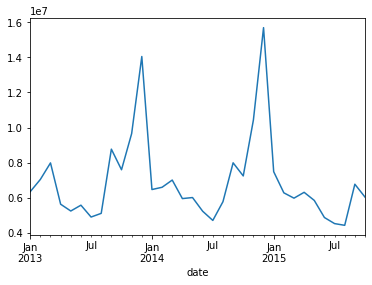

In [17]:
df_31.plot()

In [18]:
type(df_31)

pandas.core.series.Series

In [19]:
df_31.describe()

count    3.400000e+01
mean     6.918148e+06
std      2.461581e+06
min      4.413219e+06
25%      5.577087e+06
50%      6.283662e+06
75%      7.415593e+06
max      1.570406e+07
Name: revenue, dtype: float64

In [20]:
time_series = pd.DataFrame(df_31)
time_series

,revenue
date,
2013-01-31,6.334219e+06
2013-02-28,7.033617e+06
2013-03-31,7.977839e+06
2013-04-30,5.618394e+06
2013-05-31,5.230774e+06
2013-06-30,5.563319e+06
2013-07-31,4.886088e+06
2013-08-31,5.096481e+06
2013-09-30,8.763814e+06


## Stationary Test

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
stationary_test=adfuller(time_series['revenue'])

In [23]:
def adfuller_test(revenue):
    stationary_test=adfuller(revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(stationary_test,labels):
        print(label+' : '+str(value) )

if stationary_test[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary")
else:
    print("Data is non-stationary ")

adfuller_test(time_series['revenue'])

Reject the null hypothesis. Data is stationary
ADF Test Statistic : -8.484956815024823
p-value : 1.361170900853303e-13
#Lags Used : 10
Number of Observations : 23


In [24]:
rev_diff = time_series - time_series.shift(1)

In [25]:
rev_diff["second_diff"] = rev_diff['revenue'] - rev_diff['revenue'].shift(1)

In [26]:
rev_diff

,revenue,second_diff
date,,
2013-01-31,NaN,NaN
2013-02-28,6.993983e+05,NaN
2013-03-31,9.442222e+05,2.448239e+05
2013-04-30,-2.359445e+06,-3.303667e+06
2013-05-31,-3.876200e+05,1.971825e+06
2013-06-30,3.325445e+05,7.201645e+05
2013-07-31,-6.772308e+05,-1.009775e+06
2013-08-31,2.103935e+05,8.876242e+05
2013-09-30,3.667333e+06,3.456939e+06


### Calculate mean square error

### Create Test and Train data

In [27]:
#create a training dataset

size = int(len(time_series) * 0.70)
df31_train = time_series[0:size]


In [28]:
df31_train.shape

(23, 1)

In [29]:
#Create a Test dataset 
df31_test = time_series[size:len(time_series)]

In [30]:
df31_test.shape

(11, 1)

### ARIMA Model

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

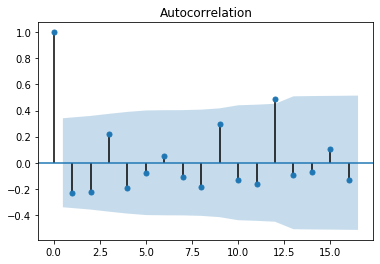

In [32]:
# plot acf to determine the value of the p parameter for the model 

first_diff = plot_acf(rev_diff['revenue'].dropna())

C:\Users\fmgri\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


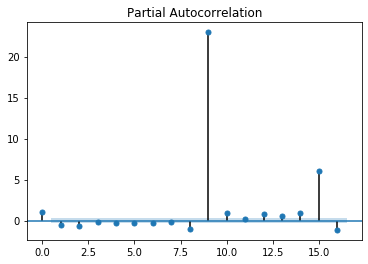

In [33]:
# plot pacf of the second revenue difference
sec_diff = plot_pacf(rev_diff['second_diff'].dropna())

In [34]:

from statsmodels.tsa.arima_model import ARIMA 
# MODEL parameters  p=1  d=0 q=1
revenue_model = ARIMA(df31_train, order=(1,0,1))

#fit MODEL

revenue_model_fit = revenue_model.fit()

revenue_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                revenue   No. Observations:                   23
Model:                     ARMA(1, 1)   Log Likelihood                -366.018
Method:                       css-mle   S.D. of innovations        1966426.550
Date:                Thu, 05 Aug 2021   AIC                            740.035
Time:                        20:36:09   BIC                            744.577
Sample:                    01-31-2013   HQIC                           741.178
                         - 11-30-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.004e+06   6.34e+05     11.040      0.000    5.76e+06    8.25e+06
ar.L1.revenue     0.3751      0.545      0.688      0.492      -0.694       1.444
ma.L1.revenue    -0.0095      0.595     -0.016      0.987      -1.175       1.156
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.6662           +0.0000j            2.6662            0.0000
MA.1          105.0886           +0.0000j          105.0886            0.0000
-----------------------------------------------------------------------------
"""

In [35]:
revenue_model_fit.resid

date
2013-01-31   -6.700992e+05
2013-02-28    2.751134e+05
2013-03-31    9.651501e+05
2013-04-30   -1.741876e+06
2013-05-31   -1.270304e+06
2013-06-30   -7.878879e+05
2013-07-31   -1.585255e+06
2013-08-31   -1.128441e+06
2013-09-30    2.464326e+06
2013-10-31   -5.334807e+04
2013-11-30    2.428939e+06
2013-12-31    6.080729e+06
2014-01-31   -3.134047e+06
2014-02-28   -2.423697e+05
2014-03-31    1.480457e+05
2014-04-30   -1.060581e+06
2014-05-31   -6.158354e+05
2014-06-30   -1.416346e+06
2014-07-31   -1.654837e+06
2014-08-31   -3.899349e+05
2014-09-30    1.440379e+06
2014-10-31   -1.236359e+05
2014-11-30    3.337975e+06
Freq: M, dtype: float64

In [36]:
revenue_forecast = revenue_model_fit.forecast(steps=11)[0]
revenue_forecast

array([8257272.7013011 , 7474261.05289718, 7180578.49303025,
       7070427.58257343, 7029113.50835682, 7013617.92396902,
       7007806.02717424, 7005626.17106117, 7004808.57693632,
       7004501.92359852, 7004386.9077652 ])

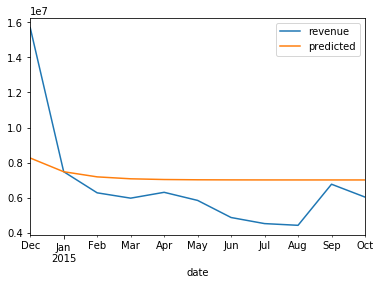

In [37]:
test_forecast = df31_test.copy()
test_forecast["predicted"] = revenue_forecast
test_forecast.plot()

## Evaluate the model 

In [38]:
from sklearn.metrics import mean_squared_error
df31_error = mean_squared_error(test_forecast["revenue"], test_forecast["predicted"])
np.sqrt(df31_error)


2662915.5784502304

## Forecast Dec 2015

In [43]:
# fit 1 month data
revenue_forecast = revenue_model_fit.forecast(steps=13)[0]
Dec2015_revenue = revenue_forecast

print(f"December 2015 Forecasted Revenue : {Dec2015_revenue[12]:,.2f}")

December 2015 Forecasted Revenue : 7,004,327.59


## Residual

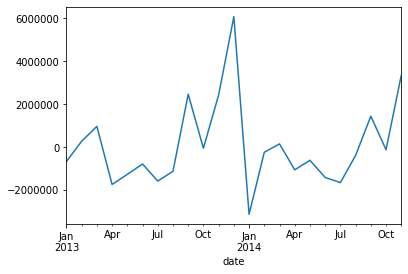

In [40]:
revenue_model_fit.resid.plot()

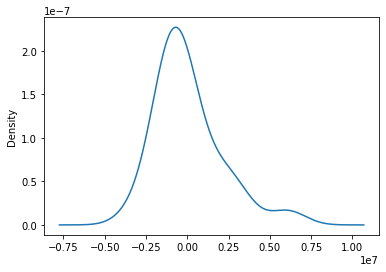

In [41]:
revenue_model_fit.resid.plot(kind='kde')